# 1.简单线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1,2,3,4,5])
y = np.array([1,3,2,3,5])

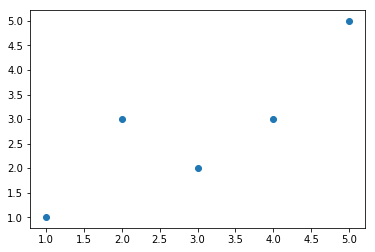

In [3]:
plt.scatter(x,y)

### 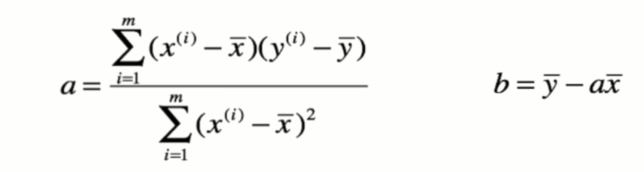

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
num = 0.0
d = 0.0
for x_i,y_i in zip (x,y):
    num +=(x_i-x_mean)*(y_i-y_mean)
    d +=(x_i-x_mean)**2
a = num/d
b = y_mean-a*x_mean

In [6]:
a

0.8

In [7]:
b

0.39999999999999947

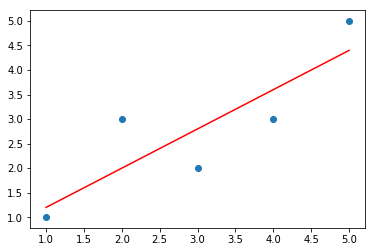

In [8]:
y_hat = a*x+b
plt.scatter(x,y)
plt.plot(x,y_hat,'r')

In [9]:
x_predict = 6
y_predict = a*x_predict+b

In [10]:
y_predict

5.2

### 把回归写成函数

In [11]:
from playML.SimpleLinearRegression import SimpleLinearRegression

In [12]:
reg1 = SimpleLinearRegression()
reg1.fit(x,y)

SimpleLinearRegression()

In [13]:
reg1.predict(np.array([x_predict]))

array([5.2])

In [14]:
reg1.a_

0.8

In [15]:
reg1.b_

0.39999999999999947

In [16]:
y_hat1 = reg1.predict(x)

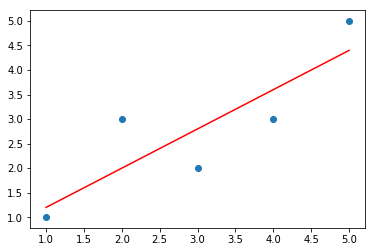

In [17]:
plt.scatter(x,y)
plt.plot(x,y_hat1,'r')

# 2. 衡量算法的标准

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 波士顿房产数据

In [19]:
boston = datasets.load_boston()

In [20]:
x = boston.data[:,5]
y = boston.target

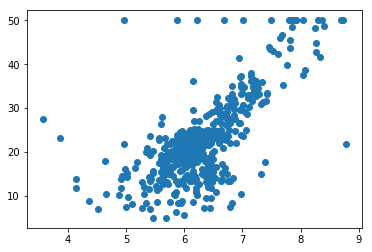

In [21]:
plt.scatter(x,y) ## 最大值得限制

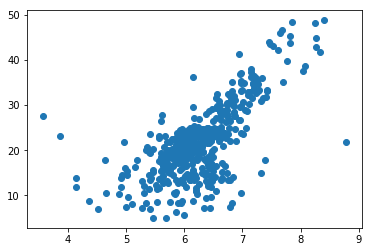

In [22]:
x = x[y<50]
y = y[y<50]
plt.scatter(x,y)

In [23]:
from playML.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_ratio= 0.2,seed=66)

In [24]:
x_train.shape

(392,)

In [25]:
x_test.shape

(98,)

In [26]:
from playML.SimpleLinearRegression import SimpleLinearRegression

In [27]:
reg1 = SimpleLinearRegression()
reg1.fit(x_train,y_train)

SimpleLinearRegression()

plt.scatter(x_train,y_train)
plt.plot(x_train,reg1.predict(x_train),'r')

In [28]:
y_predict = reg1.predict(x_test)

In [29]:
mse_test = np.sum((y_test - y_predict)**2)/len(y_test)

In [30]:
mse_test 

29.09838138454158

In [31]:
from math import sqrt
sqrt(mse_test)

5.394291555389047

In [32]:
from playML.metrices import mean_squared_error
from playML.metrices import root_mean_squared_error
from playML.metrices import mean_absolute_error

In [33]:
print(mean_squared_error(y_test,y_predict))
print(root_mean_squared_error(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))

29.098381384541607
5.394291555389049
4.050168237840153


### sklearn 中的MSE 和MAE

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [35]:
print(mean_squared_error(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))

29.09838138454158
4.0501682378401505


### R的Square

In [36]:
1-mean_squared_error(y_test,y_predict)/np.var(y_test)

0.5565811639359177

In [37]:
from playML.metrices import r2_score

In [38]:
r2_score(y_test,y_predict)

0.5565811639359173

In [39]:
reg1.score(x_test,y_test)

0.5565811639359173

# 3.多元线性回归

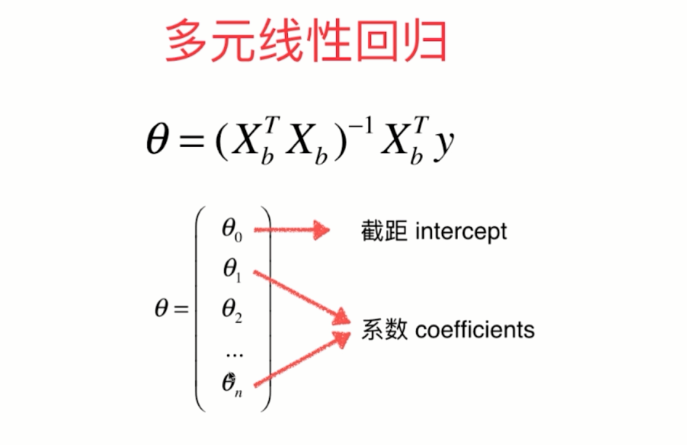

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from playML.model_selection import train_test_split
boston = datasets.load_boston()

In [41]:
X = boston.data
y = boston.target

In [42]:
X = X[y<50]
y = y[y<50]

In [43]:
X.shape

(490, 13)

In [44]:
y.shape

(490,)

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_ratio= 0.2,seed=66)

In [46]:
from playML.LinearRegression import LinearRegression

In [47]:
reg = LinearRegression()
reg.fit_normal(X_train,y_train)

LinearRegression()

In [49]:
reg.interception_

36.72625846417327

In [52]:
reg.coef_

array([-9.46021345e-02,  3.50099420e-02, -6.18447874e-02,  6.29492653e-01,
       -1.03722809e+01,  3.06661001e+00, -2.38828867e-02, -1.18340382e+00,
        2.26985767e-01, -1.29313271e-02, -8.77549620e-01,  7.38876971e-03,
       -3.82230589e-01])

In [53]:
reg.score(X_test,y_test)

0.7929370056581624

### sklearn 中使用回归  
#####  (1) LinearRegression

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from playML.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
X = boston.data
y = boston.target
X = X[y<50]
y = y[y<50]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_ratio= 0.2,seed=66)

In [56]:
lin_ger = LinearRegression()

In [57]:
lin_ger.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
lin_ger.intercept_

36.72625846417033

In [59]:
lin_ger.coef_

array([-9.46021345e-02,  3.50099420e-02, -6.18447874e-02,  6.29492653e-01,
       -1.03722809e+01,  3.06661001e+00, -2.38828867e-02, -1.18340382e+00,
        2.26985767e-01, -1.29313271e-02, -8.77549620e-01,  7.38876971e-03,
       -3.82230589e-01])

In [60]:
lin_ger.score(X_test,y_test)

0.7929370056581513

### (2) KNN Regressor

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
Knn_reg = KNeighborsRegressor()
Knn_reg.fit(X_train,y_train)
Knn_reg.score(X_test,y_test)

0.503177643965181

In [63]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
    'weights':['uniform'],
    'n_neighbors':[ i for i in range(1,11)],     
    },
    {
    'weights':['distance'],
    'n_neighbors':[ i for i in range(1,11)],
    'p': [ i for i in range(1,6)]
    }
]
knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg,param_grid ,n_jobs= 2,verbose = 2)

In [64]:
grid_search.fit(X_train,y_train)

d:\software\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:    2.2s finished
d:\software\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [65]:
grid_search.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=1,
          weights='distance')

In [66]:
grid_search.best_score_

0.6138484770218576

In [67]:
grid_search.best_estimator_.score(X_test,y_test) ## 和我们自己得到的score 是不一样的定义

0.5953091191027726

### 关于更多的线性回归模型的解释

In [68]:
lin_reg = LinearRegression()

In [69]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
lin_reg.coef_

array([-1.06715912e-01,  3.53133180e-02, -4.38830943e-02,  4.52209315e-01,
       -1.23981083e+01,  3.75945346e+00, -2.36790549e-02, -1.21096549e+00,
        2.51301879e-01, -1.37774382e-02, -8.38180086e-01,  7.85316354e-03,
       -3.50107918e-01])

In [71]:
np.argsort(lin_reg.coef_) 

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  8,  3,  5], dtype=int64)

In [72]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [73]:
boston.feature_names[np.argsort(lin_reg.coef_)]

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'INDUS', 'AGE', 'TAX',
       'B', 'ZN', 'RAD', 'CHAS', 'RM'], dtype='<U7')

In [74]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000